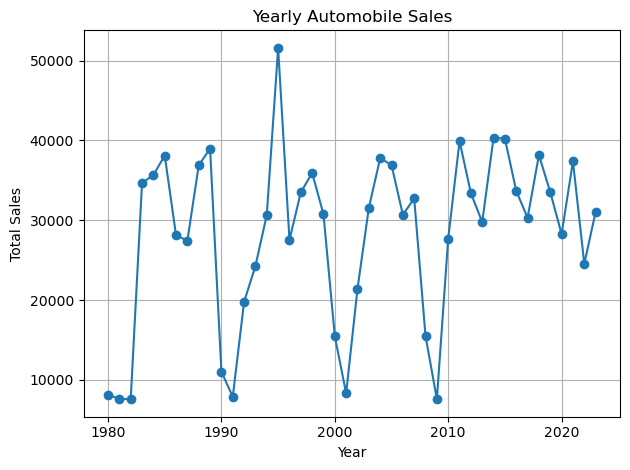

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("automobile_sales.csv") 

df.groupby('Year')['Automobile_Sales'].sum().plot(kind='line', marker='o')
plt.title("Yearly Automobile Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.savefig("Line_plot_1.png")
plt.show()


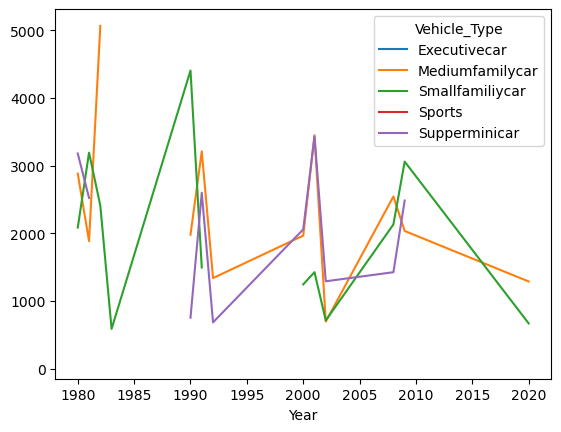

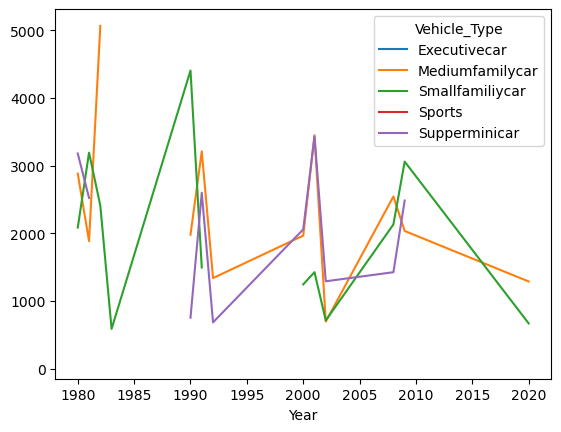

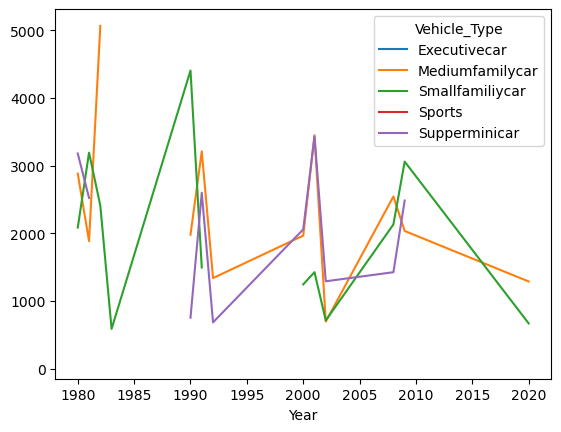

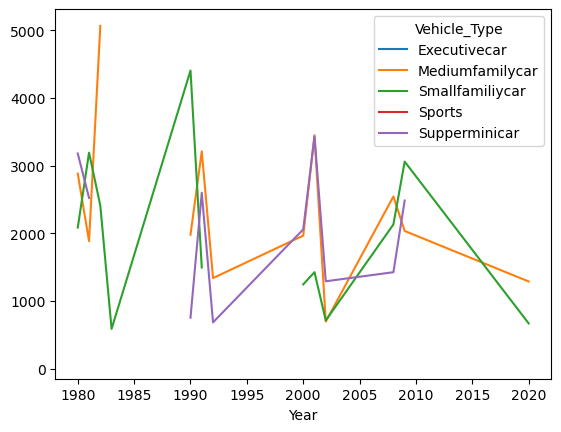

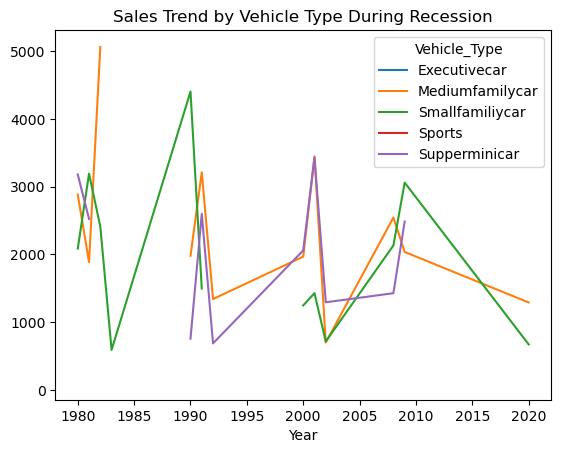

In [2]:
for vt in df['Vehicle_Type'].unique():
    df[df['Recession'] == True].groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack().plot()
plt.title("Sales Trend by Vehicle Type During Recession")
plt.savefig("Line_plot_2.png")

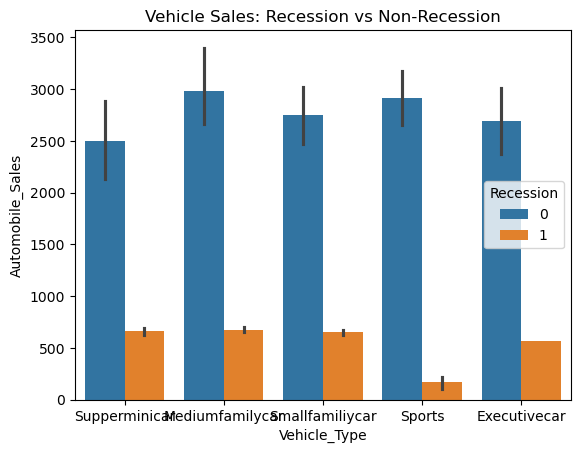

In [3]:
sns.barplot(data=df, x="Vehicle_Type", y="Automobile_Sales", hue="Recession")
plt.title("Vehicle Sales: Recession vs Non-Recession")
plt.savefig("Bar_Chart.png")

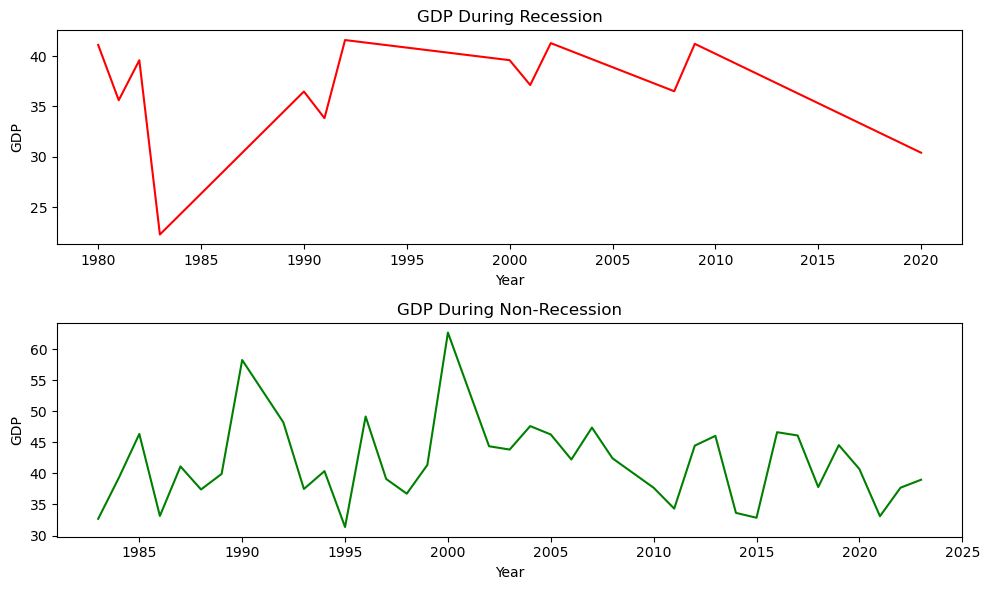

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Filter data where Recession == 1 (True)
df[df['Recession'] == 1].groupby('Year')['GDP'].mean().plot(ax=axes[0], title="GDP During Recession", color='red')

# Filter data where Recession == 0 (False)
df[df['Recession'] == 0].groupby('Year')['GDP'].mean().plot(ax=axes[1], title="GDP During Non-Recession", color='green')

axes[0].set_ylabel("GDP")
axes[1].set_ylabel("GDP")

plt.tight_layout()
plt.savefig("Subplot.png")  # Save as per assignment instruction
plt.show()


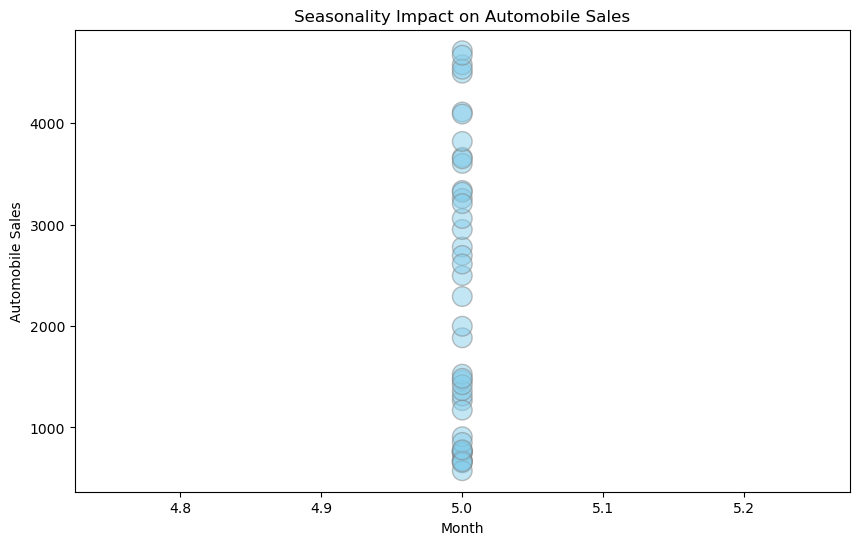

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("automobile_sales.csv")

# Convert 'Month' column to numeric if it's in string format (e.g., 'January')
if df['Month'].dtype == 'object':
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month'] = df['Month'].map(month_map)

# Check again if it's numeric now
if not np.issubdtype(df['Month'].dtype, np.number):
    raise ValueError("The 'Month' column could not be converted to numeric values.")

# Create Seasonality Factor using sinusoidal pattern if not present
if 'Seasonality_Factor' not in df.columns:
    df['Seasonality_Factor'] = np.sin(2 * np.pi * df['Month'] / 12) + 1.5

# Plot Bubble Chart
plt.figure(figsize=(10, 6))
plt.scatter(df['Month'], df['Automobile_Sales'],
            s=df['Seasonality_Factor'] * 100,
            alpha=0.5, color='skyblue', edgecolors='gray')

plt.title("Seasonality Impact on Automobile Sales")
plt.xlabel("Month")
plt.ylabel("Automobile Sales")

# Save the plot
plt.savefig("Bubble.png")
plt.show()

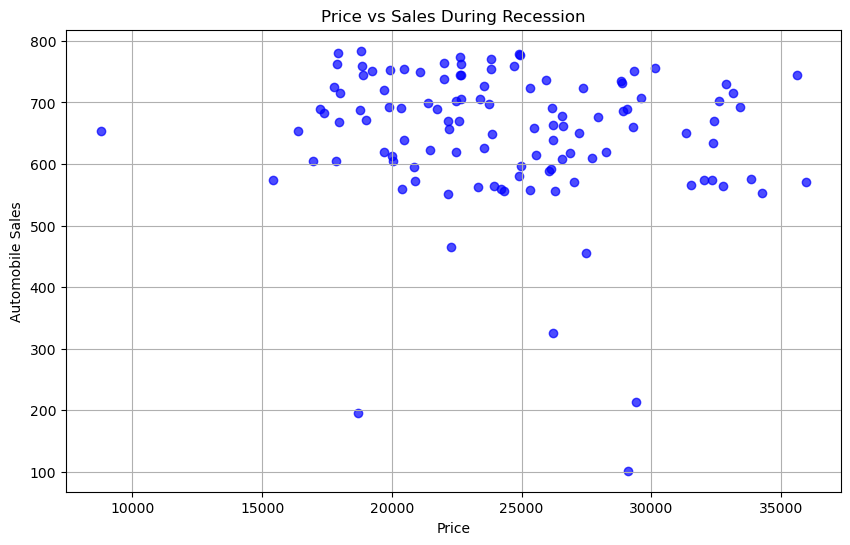

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data
df = pd.read_csv("automobile_sales.csv")

# Filter for recession period
recession_df = df[df['Recession'] == 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recession_df['Price'], recession_df['Automobile_Sales'], color='blue', alpha=0.7)
plt.title("Price vs Sales During Recession")
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.grid(True)
plt.savefig("Scatter.png")
plt.show()

In [14]:
import pandas as pd

df = pd.read_csv("automobile_sales.csv")  # Replace with your actual filename

# Print column names with visible quotes to catch hidden spaces
for col in df.columns:
    print(repr(col))


'Date'
'Year'
'Month'
'Recession'
'Consumer_Confidence'
'Seasonality_Weight'
'Price'
'Advertising_Expenditure'
'Competition'
'GDP'
'Growth_Rate'
'unemployment_rate'
'Automobile_Sales'
'Vehicle_Type'
'City'


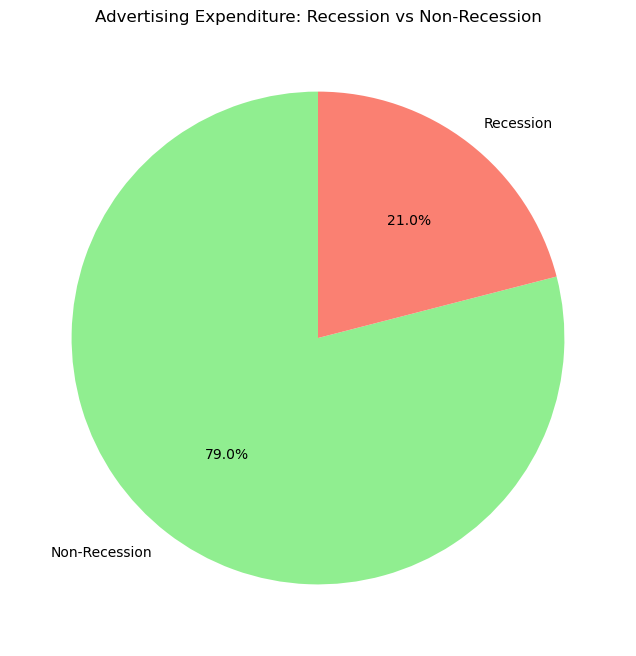

In [16]:
# Group by Recession and sum advertising expenditure
ad_data = df.groupby('Recession')['Advertising_Expenditure'].sum()
labels = ['Non-Recession', 'Recession']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(ad_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title("Advertising Expenditure: Recession vs Non-Recession")
plt.savefig("Pie_1.png")
plt.show()

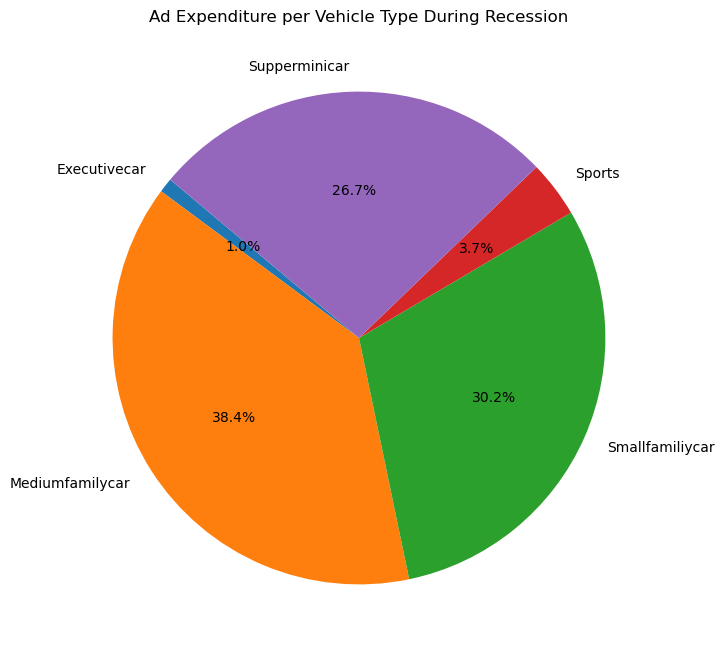

In [17]:
# Filter for recession data
recession_df = df[df['Recession'] == 1]

# Group by Vehicle Type
vehicle_ad_data = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_ad_data, labels=vehicle_ad_data.index, autopct='%1.1f%%', startangle=140)
plt.title("Ad Expenditure per Vehicle Type During Recession")
plt.savefig("Pie_2.png")
plt.show()

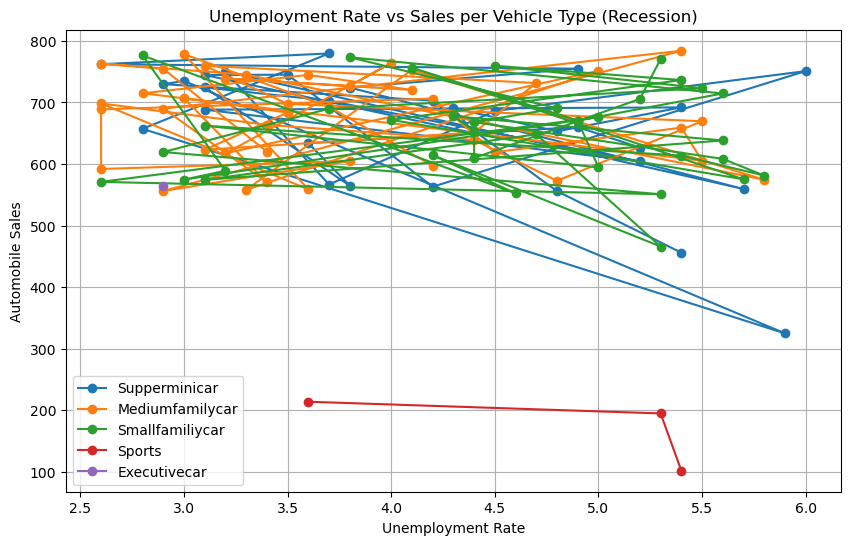

In [18]:
# Filter data for recession period
recession_df = df[df['Recession'] == 1]

# Create line plot per vehicle type
plt.figure(figsize=(10, 6))
for vehicle in recession_df['Vehicle_Type'].unique():
    subset = recession_df[recession_df['Vehicle_Type'] == vehicle]
    plt.plot(subset['unemployment_rate'], subset['Automobile_Sales'], marker='o', label=vehicle)

plt.xlabel("Unemployment Rate")
plt.ylabel("Automobile Sales")
plt.title("Unemployment Rate vs Sales per Vehicle Type (Recession)")
plt.legend()
plt.grid(True)
plt.savefig("Line_plot_3.png")
plt.show()

In [19]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

In [20]:
app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"


In [21]:
dcc.Dropdown(id='vehicle-dropdown', options=[{'label': i, 'value': i} for i in df['Vehicle_Type'].unique()])


Dropdown(options=[{'label': 'Supperminicar', 'value': 'Supperminicar'}, {'label': 'Mediumfamilycar', 'value': 'Mediumfamilycar'}, {'label': 'Smallfamiliycar', 'value': 'Smallfamiliycar'}, {'label': 'Sports', 'value': 'Sports'}, {'label': 'Executivecar', 'value': 'Executivecar'}], id='vehicle-dropdown')

In [22]:
html.Div(id='output-container', className='output-box')


Div(id='output-container', className='output-box')

In [23]:
@app.callback(
    Output('output-container', 'children'),
    Input('vehicle-dropdown', 'value')
)
def update_output(value):
    return f"You selected: {value}"


In [48]:
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

# Load dataset
df = pd.read_csv("automobile_sales.csv")

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"  # Task 2.1

# Task 2.2 - Dropdowns
app.layout = html.Div([
    html.H1("Asif_Automotives - Automobile Sales Analysis Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Select Report Type:"),
        dcc.Dropdown(
            id='report-type',
            options=[
                {'label': 'Recession Report', 'value': 'recession'},
                {'label': 'Yearly Report', 'value': 'yearly'}
            ],
            value='recession'
        ),
    ], style={'width': '48%', 'display': 'inline-block'}),

    # Task 2.3 - Output division
    html.Div(id='output-container', className='output-container'),

    # Placeholder for graphs
    dcc.Graph(id='report-graph')
])

# Task 2.4 - Callback
@app.callback(
    Output('output-container', 'children'),
    Output('report-graph', 'figure'),
    Input('report-type', 'value')
)
def update_output(selected_report):
    if selected_report == 'recession':
        # Task 2.5 - Recession Report Graphs
        recession_df = df[df['Recession'] == 1]

        fig = px.line(
            recession_df,
            x='Year',
            y='Automobile_Sales',
            color='Vehicle_Type',
            title='Recession Period: Automobile Sales by Vehicle Type'
        )

        return html.H3("Recession Report Statistics"), fig

    elif selected_report == 'yearly':
        # Task 2.6 - Yearly Report Graphs
        yearly_sales = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

        fig = px.line(
            yearly_sales,
            x='Year',
            y='Automobile_Sales',
            color='Vehicle_Type',
            title='Yearly Automobile Sales by Vehicle Type'
        )

        return html.H3("Yearly Report Statistics"), fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)
